# After Training

In this exercise, you will create a deep learning model, save it, and load it to evaluate its performance on unseen data.

In [1]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from path import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
df = pd.read_csv(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 14\2\04-Stu_After_Training\Resources\music.csv',
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [3]:
# Define the features set 'X', and the target 'y' set.
X = df.iloc[:, 0:67].values

y = df.iloc[:, 68:70].values

In [4]:
# Split the data into training and testing sets using the train_test_split method from sklearn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)

In [5]:
# Scale the data for the features set X_tain and X_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Create a neural network with 1 hidden layer
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8,
             input_dim=67,
             activation="relu"))

# Output layer
nn.add(Dense(units=2, 
             activation="linear"))

In [7]:
# Compile model
nn.compile(loss="mean_squared_error",
           optimizer="adam",
           metrics=["mse"])

# Fit the model
model_1 = nn.fit(X_train_scaled,
                 y_train,
                 epochs=200,
                 verbose=0)

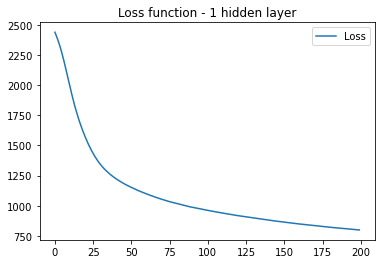

In [8]:
# Plot the training loss function
plt.plot(model_1.history["loss"])
plt.title("Loss function - 1 hidden layer")
plt.legend(["Loss"])
plt.show()

In [9]:
# Save model as JSON
nn_json = nn.to_json()

file_path = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 14\2\04-Stu_After_Training\Resources\model_TT_04.json')

with open(file_path, "w") as json_file:
    json_file.write(nn_json)
    
# Save weights
file_path = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 14\2\04-Stu_After_Training\Resources\model_TT_04.h5')

nn.save_weights(file_path)

In [10]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 14\2\04-Stu_After_Training\Resources\model_TT_04.json')

with open(file_path, "r") as json_file:
    model_json = json_file.read()

loaded_model = model_from_json(model_json)

# load weights into new model
file_path = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 14\2\04-Stu_After_Training\Resources\model_TT_04.h5')

loaded_model.load_weights(file_path)

In [11]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (794, 67)
X_test shape: (265, 67)
y_train shape: (794, 2)
y_test shape: (265, 2)


In [12]:
y_test_df = pd.DataFrame(y_test)

y_test_df.shape

(265, 2)

In [13]:
y_train_df = pd.DataFrame(y_train)

y_train_df.shape

(794, 2)

In [14]:
X_test_scaled.shape

(265, 67)

In [23]:
# Predict values using the testing data
pred = loaded_model.predict(X_test_scaled)

pred_df = pd.DataFrame(pred,
                       columns=["Pred 0", "Pred 1"])

pred_df.head()

,Pred 0,Pred 1
0,42.301117,-2.288510
1,29.730921,44.814816
2,32.607746,-3.512532
3,29.136492,140.565277
4,25.244282,26.982050


In [44]:
final_df = pd.concat([y_test_df, pred_df],
                     axis=1)

final_df.columns = ["Actual0", "Actual1", "Pred0", "Pred1"]

final_df.head()

,Actual0,Actual1,Pred0,Pred1
0,12.65,-8.00,42.301117,-2.288510
1,42.86,74.60,29.730921,44.814816
2,41.90,12.48,32.607746,-3.512532
3,-35.30,149.12,29.136492,140.565277
4,34.03,-6.85,25.244282,26.982050


In [41]:
final_df.shape

(265, 4)

In [50]:
# Evaluate the model with the MSE metric
from sklearn.metrics import mean_squared_error

mse_0 = mean_squared_error(final_df["Actual0"], final_df["Pred0"])

mse_1 = mean_squared_error(final_df["Actual1"], final_df["Pred1"])

print(f"MSE for 0: {mse_0}")
print()
print(f"MSE for 1: {mse_1}")

MSE for 0: 347.00291294831123

MSE for 1: 1960.8745888878705


In [53]:
# Alternatively
mse = mean_squared_error(y_test, pred_df)

print(f"MSE is: {mse}")

MSE is: 1153.9387509180915
